In [ ]:
#@markdown # 필요한 라이브러리 설치
#@markdown ### 함수를 사용하기 전에 아래의 Colab 셀을 실행하여 필요한 라이브러리를 설치하고 함수를 정의하십시오.
#@markdown ### "실행" 버튼을 클릭하거나 "Ctrl + Enter" 키보드 단축키를 사용하여 실행할 수 있습니다.
#@markdown
#@markdown 필요한 모듈 가져오기
#@markdown 사전 학습된 모델 경로 정의
#@markdown 사전 학습된 모델에서 안정적 확산 파이프라인 생성
#@markdown 이미지 그리드 생성 함수 정의
#@markdown 자연어 모델 및 확률적 확산을 사용하여 이미지 생성 함수 정의

#@markdown GPU가 활성화되어 있는지 확인하십시오. 그렇지 않으면 오류가 발생합니다.
#@markdown GPU 활성화 여부를 확인하려면 Colab 메뉴 바의 "런타임"으로 이동하여 "런타임 유형 변경"을 선택하고 "하드웨어 가속기" 옵션이 "GPU"로 설정되어 있는지 확인하십시오.

%%capture
!pip install transformers scipy ftfy
!pip install diffusers[torch]
import numpy as np
import torch
from torch import autocast

from diffusers import StableDiffusionPipeline, EulerAncestralDiscreteScheduler

dir_model = "Jartemio/The_Owl_Characters_V2"

#@markdown Create a stable diffusion pipeline from pre-trained model
scheduler = EulerAncestralDiscreteScheduler(beta_start=0.00085, beta_end=0.012, beta_schedule="scaled_linear")
pipe = StableDiffusionPipeline.from_pretrained(dir_model, custom_pipeline="lpw_stable_diffusion", scheduler=scheduler, safety_checker=None, torch_dtype=torch.float16).to("cuda")

from PIL import Image

def image_grid(imgs, rows, cols):
    """
    Creates an image grid from a list of images.
    Args:
        imgs (list): List of PIL image objects.
        rows (int): Number of rows in the image grid.
        cols (int): Number of columns in the image grid.

    Returns:
        PIL image representing the image grid.
    """
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid
def generate_images(text, negative_text, steps=20, count=1, input_seed=0, guidance_scale=7.5, image_height=8, image_width=8):
    """
    Generates images using natural language model and stochastic diffusion.
    Args:
        text (str): Input text for image generation.
        negative_text (str): Negative text for image generation.
        steps (int): Number of inference steps used for image generation.
        count (int): Number of times a set of images is generated.
        input_seed (int): Random seed used for image generation.
        guidance_scale (float): Orientation scale used for image generation.
        image_height (int): Height of generated images.
        image_width (int): Width of generated images.

    Returns:
        A list of PIL image objects representing the generated images.
    """
    image_all = []
    seed_show = []

    for i in range(count):
        prompt = text
        negative_prompt_temp = negative_text

        # Calculate the dimensions of the generated image
        hg = (8*8)*image_height 
        wd = (8*8)*image_width

        if input_seed > -1:
            print(f"custom seed to: {input_seed}. Only one image will be generated")
            seed = input_seed
            count = 1
        else:
            seed = np.random.randint(0, 9999999999)
        
        generator = torch.Generator("cuda").manual_seed(int(seed))

        print(f"Image {i+1}")
        print(f"seed: {seed}")
        with autocast("cuda"):
            # Generate the image using the stable diffusion pipeline and the random seed
            image = pipe(prompt=prompt, width=wd, height=hg, negative_prompt=negative_prompt_temp, guidance_scale=guidance_scale, num_inference_steps=steps, generator=generator).images

        for index, imageN in enumerate(image):
            # Display the generated image
            display(imageN)
            image_all.append(imageN)

        if input_seed > -1:
            return image_all

    return image_all
%%capture


Image 1
seed: 5583607081


  0%|          | 0/50 [00:00<?, ?it/s]

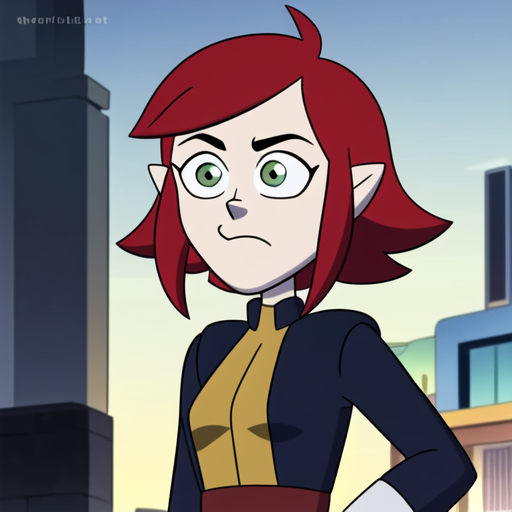

In [ ]:
#@markdown # <strong> [Jartemio/The_Owl_Characters_V2](https://huggingface.co/Jartemio/The_Owl_Characters_V2)</strong>

#@markdown ### The following tags correspond to characters from the animated series "The Owl House". You can include them in the prompt to generate images related to them.

#@markdown - AmityBlight
#@markdown - EdalynClawthorne
#@markdown - EmperorBelos
#@markdown - GusPorter
#@markdown - HunterGoldenGuard
#@markdown - LilithClawthorne
#@markdown - LuzNoceda
#@markdown - RaineWhispers
#@markdown - TheCollector
#@markdown - WillowPark
#@markdown - KingClawthorne

#@markdown ### Input parameters
#@markdown - `prompt`: Input text for image generation. Must include the "aniscreen" tag for the model to activate on the image.
#@markdown - `prompt_negative`: Negative text for image generation.
#@markdown - `steps`: Number of inference steps used for image generation (If it's a value greater than -1, only one image is generated with that seed). Minimum value: 10. Maximum value: 500. Increment: 10.
#@markdown - `tiros_count`: Number of times a set of images is generated.
#@markdown - `input_seed`: Random seed used for image generation. Minimum value: 0.
#@markdown - `guidance_scale`: Orientation scale used for image generation. Minimum value: 0.0.
#@markdown - `image_height`: Height of generated images. Minimum value: 2. Maximum value: 12. Increment: 1.
#@markdown - `image_width`: Width of generated images. Minimum value: 2. Maximum value: 12. Increment: 1.

prompt = "aniscreen, 1girl, red hair, upper body" #@param {type:"string"}
prompt_negative = "worst quality, bad quality, text, signature, watermark, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry, poorly drawn face, mutation, disfigured, messy drawing, broken legs, nsfw" #@param {type:"string"}
steps = 50 #@param {type:"integer", min:10, max:500, step:10}
tiros_count = 1 #@param {type:"integer"}
input_seed = -1 #@param {type:"integer", min:-1}
guidance_scale = 7.5 #@param {type:"number", min:0.0}
image_height = 8 #@param {type:"slider", min:2, max:12, step:1}
image_width = 8 #@param {type:"slider", min:2, max:12, step:1}

# Generate images using the previously defined parameters

if tiros_count > 0:
    image_all = generate_images(prompt, prompt_negative, steps, tiros_count, input_seed, guidance_scale, image_height, image_width)
    
    n_images = len(image_all)
    n_cols = min(n_images, 3)
    n_rows = int(np.ceil(n_images / n_cols))
    grid_width = image_width * 64 * n_cols
    grid_height = image_height * 64 * n_rows

    # Create a large PIL image for the grid
    grid = Image.new('RGB', size=(grid_width, grid_height))

    # Copy each generated image into the grid
    for i, img in enumerate(image_all):
        col = i % n_cols
        row = i // n_cols
        x = col * image_width * 64
        y = row * image_height * 64
        grid.paste(img, box=(x, y))
        
if tiros_count > 1:
    display(grid)